In [1]:
from __future__ import print_function

In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
import matplotlib.pyplot as plt

In [4]:
use_cuda = torch.cuda.is_available()

In [5]:
from dataset import dataset
from AlexNet import AlexNet
from train_test import start_train_test

In [6]:
trainloader, testloader, outputs, inputs = dataset('mnist')
print ('Output classes: {}\nInput channels: {}'.format(outputs, inputs))

| Preparing MNIST dataset...
Output classes: 10
Input channels: 1


In [7]:
net = AlexNet(num_classes = outputs,inputs=inputs)
file_name = 'alexnet-'

In [8]:
if use_cuda:
    net.cuda()
    net = torch.nn.DataParallel(net, device_ids=range(torch.cuda.device_count()))
    cudnn.benchmark = True

In [9]:
criterion = nn.CrossEntropyLoss()

In [10]:
train_loss, test_loss = start_train_test(net, trainloader, testloader, criterion)


=> Training Epoch #1, LR=0.0010


/home/insideout/anaconda3/programs/mygit/Very-Deep-Learning-CNN/train_test.py:31: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  train_loss += loss.data[0]
/home/insideout/anaconda3/programs/mygit/Very-Deep-Learning-CNN/train_test.py:35: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  train_loss_stacked = np.append(train_loss_stacked, loss.data[0].cpu().numpy())


| Epoch [  1/ 10] 		Loss: 0.1111 Acc@1: 59.000%


/home/insideout/anaconda3/programs/mygit/Very-Deep-Learning-CNN/train_test.py:37: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  %(epoch, cf.num_epochs, loss.data[0], 100.*correct/total))
/home/insideout/anaconda3/programs/mygit/Very-Deep-Learning-CNN/train_test.py:57: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  test_loss += loss.data[0]
/home/insideout/anaconda3/programs/mygit/Very-Deep-Learning-CNN/train_test.py:61: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  test_loss_stacked = np.append(test_loss_stacked, loss.data[0].cpu().numpy())



| Validation Epoch #1			Loss: 0.0601 Acc@1: 91.00%
* Test results : Acc@1 = 91.00%
| Elapsed time : 0:00:05

=> Training Epoch #2, LR=0.0010


/home/insideout/anaconda3/programs/mygit/Very-Deep-Learning-CNN/train_test.py:66: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  print("\n| Validation Epoch #%d\t\t\tLoss: %.4f Acc@1: %.2f%%" % (epoch, loss.data[0], acc))


| Epoch [  2/ 10] 		Loss: 0.1145 Acc@1: 94.000%

| Validation Epoch #2			Loss: 0.0053 Acc@1: 96.00%
* Test results : Acc@1 = 96.00%
| Elapsed time : 0:00:08

=> Training Epoch #3, LR=0.0010
| Epoch [  3/ 10] 		Loss: 0.0457 Acc@1: 96.000%

| Validation Epoch #3			Loss: 0.0055 Acc@1: 97.00%
* Test results : Acc@1 = 97.00%
| Elapsed time : 0:00:11

=> Training Epoch #4, LR=0.0010
| Epoch [  4/ 10] 		Loss: 0.0798 Acc@1: 96.000%

| Validation Epoch #4			Loss: 0.0021 Acc@1: 98.00%
* Test results : Acc@1 = 98.00%
| Elapsed time : 0:00:14

=> Training Epoch #5, LR=0.0010
| Epoch [  5/ 10] 		Loss: 0.0659 Acc@1: 97.000%

| Validation Epoch #5			Loss: 0.0059 Acc@1: 97.00%
* Test results : Acc@1 = 98.00%
| Elapsed time : 0:00:17

=> Training Epoch #6, LR=0.0010
| Epoch [  6/ 10] 		Loss: 0.0788 Acc@1: 97.000%

| Validation Epoch #6			Loss: 0.0015 Acc@1: 98.00%
* Test results : Acc@1 = 98.00%
| Elapsed time : 0:00:20

=> Training Epoch #7, LR=0.0010
| Epoch [  7/ 10] 		Loss: 0.0812 Acc@1: 98.000%

|

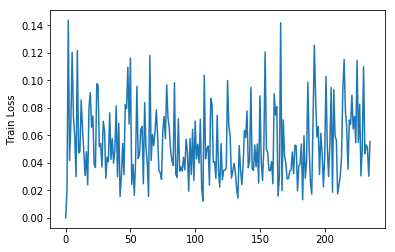

In [12]:
plt.plot(train_loss)
plt.ylabel('Train Loss')
plt.show()

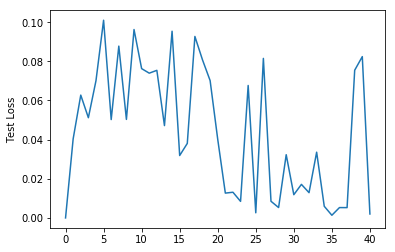

In [13]:
plt.plot(test_loss)
plt.ylabel('Test Loss')
plt.show()